# Group 16 End Term Project 2

## Sentiment Analysis

In [2]:
import re
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\Prince\Downloads\FintechApp_dataset.csv",usecols = ["content"])

In [4]:
df.head()

,content
0,"Very bad experience, zero 🌟."
1,Regular payments failure and takes more than 1...
2,It keeps on disabling my account saying accoun...
3,Very bad service from gpay their specialist te...
4,Very bad app


In [5]:
a=df.to_string(header=False,index=False)

In [6]:
cleaned_review = re.sub(re.compile('<.*?>'), '', a) #removing HTML tags
cleaned_review = re.sub('[^A-Za-z0-9]+', ' ', cleaned_review) #taking only words


In [7]:
cleaned_review = cleaned_review.lower()

In [8]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

tokens = nltk.word_tokenize(cleaned_review)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prince\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prince\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
text = " ".join(cat for cat in filtered_review)

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
from wordcloud import WordCloud, STOPWORDS
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)

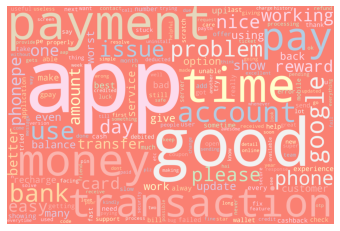

In [15]:
    import matplotlib.pyplot as plt
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

In [16]:
# Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prince\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Prince\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [19]:
from textblob import TextBlob

In [20]:
text = " ".join(cat for cat in lemm_review)

In [21]:
res = TextBlob(text)

In [22]:
print(res.sentiment.polarity)

0.18118183162954338


In [23]:
pip install vader

  Created wheel for sonopy: filename=sonopy-0.1.2-py3-none-any.whl size=2879 sha256=e4879c6f07093cae21c7dd52dfad65916ba4c14606f8c29ba85f4c9597063446
  Stored in directory: c:\users\prince\appdata\local\pip\cache\wheels\61\ad\07\1ac1172c8a0b8754f595f2f6779bc7dcbe75f1783d5b576b76
Successfully built sonopy
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install vadersentiment

Note: you may need to restart the kernel to use updated packages.


In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [169]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Prince\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [171]:
df['scores'] = df['content'].apply(lambda review: sid.polarity_scores(review))

df.head()

,content,score,totalwords,clean_review,scores
1,Regular payments failure and takes more than 1...,1,15,regular payments failure takes 10 days time re...,"{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'comp..."
2,It keeps on disabling my account saying accoun...,1,34,keeps disabling account saying account tempora...,"{'neg': 0.276, 'neu': 0.647, 'pos': 0.076, 'co..."
3,Very bad service from gpay their specialist te...,1,26,bad service gpay specialist team able solve pr...,"{'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'comp..."
4,Very bad app,1,3,bad app,"{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'comp..."
7,Guys if you have updated your app then please ...,1,69,guys updated app please inform users app updat...,"{'neg': 0.032, 'neu': 0.935, 'pos': 0.033, 'co..."


In [172]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,content,score,totalwords,clean_review,scores,compound
1,Regular payments failure and takes more than 1...,1,15,regular payments failure takes 10 days time re...,"{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'comp...",-0.5106
2,It keeps on disabling my account saying accoun...,1,34,keeps disabling account saying account tempora...,"{'neg': 0.276, 'neu': 0.647, 'pos': 0.076, 'co...",-0.8641
3,Very bad service from gpay their specialist te...,1,26,bad service gpay specialist team able solve pr...,"{'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'comp...",-0.9097
4,Very bad app,1,3,bad app,"{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'comp...",-0.5849
7,Guys if you have updated your app then please ...,1,69,guys updated app please inform users app updat...,"{'neg': 0.032, 'neu': 0.935, 'pos': 0.033, 'co...",0.0258


In [173]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,content,score,totalwords,clean_review,scores,compound,comp_score
1,Regular payments failure and takes more than 1...,1,15,regular payments failure takes 10 days time re...,"{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'comp...",-0.5106,neg
2,It keeps on disabling my account saying accoun...,1,34,keeps disabling account saying account tempora...,"{'neg': 0.276, 'neu': 0.647, 'pos': 0.076, 'co...",-0.8641,neg
3,Very bad service from gpay their specialist te...,1,26,bad service gpay specialist team able solve pr...,"{'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'comp...",-0.9097,neg
4,Very bad app,1,3,bad app,"{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'comp...",-0.5849,neg
7,Guys if you have updated your app then please ...,1,69,guys updated app please inform users app updat...,"{'neg': 0.032, 'neu': 0.935, 'pos': 0.033, 'co...",0.0258,pos


## Topic Modelling of good reviews

In [98]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Prince\Downloads\FintechApp_dataset.csv", usecols=['content','score'])#mention the name of file to be extracted
df

,content,score
0,"Very bad experience, zero 🌟.",1
1,Regular payments failure and takes more than 1...,1
2,It keeps on disabling my account saying accoun...,1
3,Very bad service from gpay their specialist te...,1
4,Very bad app,1
...,...,...
199995,Very good service,5
199996,Very good service,5
199997,Very good service,5
199998,Very good service,5


In [99]:
df['totalwords'] = df['content'].str.split().str.len() # Calculate word count

In [100]:
data = df.loc[df['totalwords'] > 5] #Removing all reviews having less than two words

In [101]:
data = data.drop('totalwords',axis = 1)

In [102]:
data = df.loc[df['score'] > 3] #Removing all positive reviews to focus on negative reviews and understand the problem

In [103]:
df = data[data['content'].map(lambda x: x.isascii())] #Removing all non-english reviews

In [104]:
df = df.dropna(how='all') # dropping blank rows

In [105]:
df

,content,score,totalwords
60001,Nice.thanks,4,1
60002,Good..but some times payment sending is pendin...,4,8
60003,Its very helpful,4,3
60004,Good app,4,2
60005,I love you gpay but it's one thing you're not ...,4,39
...,...,...,...
199995,Very good service,5,3
199996,Very good service,5,3
199997,Very good service,5,3
199998,Very good service,5,3


In [106]:
xx = df['content'].to_string(header=False, index=False)

In [107]:
import re


def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text


# Example string with weird font characters plus an URL which we gonna remove.
sample =  xx

sample = remove_url(sample)
#print(f"Text after removing url:- \n {sample}")

In [108]:
!pip install demoji
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string


#print(f"Before Handling emoji:- \n {sample}")
#print(f"After Handling emoji:- \n {handle_emoji(sample)}")

In [109]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text


sample = sample
#print(sample)
#print(word_tokenizer(sample))

In [115]:
def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    
    return text


#print(f"Before removing stopwords : {word_tokenizer(sample)}")
#print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")

In [116]:
def preprocessing(text):
    
    text = remove_url(text) 
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [118]:
import spacy
sp = spacy.load("en_core_web_sm")

In [119]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review'] = df['content'].progress_map(preprocessing)

100%|██████████| 72316/72316 [00:31<00:00, 2318.49it/s] 


In [120]:
import gensim #Topic Modelling Technicque called LDA (Latent Dirichlet Allocation)
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df['clean_review']
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['nicethanks']


In [121]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [122]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['crypto','even','early'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prince\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
!pip install spacy
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ','ADV'])
print(data_lemmatized[:1])

[[]]


In [124]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[]]


In [125]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [126]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 10, #change it 1-10
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           per_word_topics=True)

In [127]:
from gensim.models import CoherenceModel
# Compute Coherence Score for topic 2
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.416025568538438


In [128]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.232*"really" + 0.110*"helpful" + 0.105*"happy" + 0.033*"star" + '
  '0.031*"fund" + 0.025*"rate" + 0.020*"phonpe" + 0.019*"code" + '
  '0.017*"download" + 0.017*"directly"'),
 (1,
  '0.677*"good" + 0.071*"online" + 0.047*"super" + 0.047*"work" + 0.026*"year" '
  '+ 0.010*"world" + 0.008*"translation" + 0.008*"train" + 0.005*"trust" + '
  '0.004*"job"'),
 (2,
  '0.000*"batch" + 0.000*"appso" + 0.000*"maney" + 0.000*"salo" + '
  '0.000*"examination" + 0.000*"semister" + 0.000*"grateful" + '
  '0.000*"appgreat" + 0.000*"superblife" + 0.000*"appamazing"'),
 (3,
  '0.282*"app" + 0.055*"fast" + 0.045*"pay" + 0.040*"time" + 0.036*"useful" + '
  '0.036*"well" + 0.021*"problem" + 0.020*"excellent" + 0.020*"great" + '
  '0.020*"bill"'),
 (4,
  '0.000*"batch" + 0.000*"appso" + 0.000*"maney" + 0.000*"salo" + '
  '0.000*"examination" + 0.000*"semister" + 0.000*"grateful" + '
  '0.000*"appgreat" + 0.000*"superblife" + 0.000*"appamazing"'),
 (5,
  '0.286*"easy" + 0.117*"use" + 0.117*"transf

### Topic Modelling of poor and unsatisfactory reviews

In [143]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Prince\Downloads\FintechApp_dataset.csv", usecols=['content','score'])#mention the name of file to be extracted
df

,content,score
0,"Very bad experience, zero 🌟.",1
1,Regular payments failure and takes more than 1...,1
2,It keeps on disabling my account saying accoun...,1
3,Very bad service from gpay their specialist te...,1
4,Very bad app,1
...,...,...
199995,Very good service,5
199996,Very good service,5
199997,Very good service,5
199998,Very good service,5


In [144]:
df['totalwords'] = df['content'].str.split().str.len() # Calculate word count

In [145]:
data = df.loc[df['totalwords'] > 5] #Removing all reviews having less than two words

In [146]:
data = data.drop('totalwords',axis = 1)

In [147]:
data = df.loc[df['score'] < 2] #Removing all positive reviews to focus on negative reviews and understand the problem

In [148]:
df = data[data['content'].map(lambda x: x.isascii())] #Removing all non-english reviews

In [149]:
df = df.dropna(how='all') # dropping blank rows


In [150]:
xx = df['content'].to_string(header=False, index=False)

In [151]:
import re


def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text


# Example string with weird font characters plus an URL which we gonna remove.
sample =  xx

sample = remove_url(sample)
#print(f"Text after removing url:- \n {sample}")

In [152]:
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string


#print(f"Before Handling emoji:- \n {sample}")
#print(f"After Handling emoji:- \n {handle_emoji(sample)}")

In [154]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text


sample = sample
#print(sample)
#print(word_tokenizer(sample))

In [155]:
def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    
    return text


#print(f"Before removing stopwords : {word_tokenizer(sample)}")
#print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")

In [156]:
def preprocessing(text):
    
    text = remove_url(text) 
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [158]:
import spacy
sp = spacy.load("en_core_web_sm")

In [159]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review'] = df['content'].progress_map(preprocessing)

100%|██████████| 36496/36496 [00:39<00:00, 927.04it/s] 


In [160]:
import gensim #Topic Modelling Technicque called LDA (Latent Dirichlet Allocation)
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df['clean_review']
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['regular', 'payments', 'failure', 'takes', 'days', 'time', 'refund', 'amount', 'back']


In [161]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [162]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['crypto','even','early'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prince\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ','ADV'])
print(data_lemmatized[:1])

[['regular', 'payment', 'failure', 'day', 'time', 'refund', 'amount', 'back']]


In [164]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (3, 1), (5, 1), (6, 1), (8, 1), (94, 1), (131, 1)]]


In [165]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [166]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 10, #change it 1-10
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           per_word_topics=True)

In [167]:
from gensim.models import CoherenceModel
# Compute Coherence Score for topic 2
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.48493665593101093


In [168]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.000*"lol" + 0.000*"chargable" + 0.000*"laggy" + 0.000*"showingit" + '
  '0.000*"satisfy" + 0.000*"agin" + 0.000*"occasionally" + 0.000*"agian" + '
  '0.000*"tata" + 0.000*"appso"'),
 (1,
  '0.000*"lol" + 0.000*"chargable" + 0.000*"laggy" + 0.000*"showingit" + '
  '0.000*"satisfy" + 0.000*"agin" + 0.000*"occasionally" + 0.000*"agian" + '
  '0.000*"tata" + 0.000*"appso"'),
 (2,
  '0.108*"issue" + 0.107*"wallet" + 0.083*"also" + 0.053*"good" + '
  '0.041*"update" + 0.038*"cash" + 0.034*"coupon" + 0.032*"user" + '
  '0.027*"reward" + 0.024*"lot"'),
 (3,
  '0.193*"money" + 0.099*"phone" + 0.066*"pay" + 0.039*"option" + 0.038*"pe" + '
  '0.033*"use" + 0.029*"number" + 0.027*"transfer" + 0.026*"recharge" + '
  '0.024*"bill"'),
 (4,
  '0.078*"payment" + 0.073*"time" + 0.070*"account" + 0.062*"customer" + '
  '0.059*"day" + 0.058*"amount" + 0.032*"support" + 0.026*"still" + '
  '0.025*"care" + 0.024*"ever"'),
 (5,
  '0.000*"lol" + 0.000*"chargable" + 0.000*"laggy" + 0.000*"showingit" 

#### Through this project we analysed the sentiments in fintech app reviews, and also prepared a topic modelling framework to understand both good reviews and bad reviews 